In [2]:
import pandas as pd
sandy = pd.read_csv('311data.csv', index_col=[0])
sandy.head()

,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
id,,,,,,,,,,,,,
23531046,NaN,111 LAWRENCE STREET,BROOKLYN,BROOKLYN,40.69283,-73.98623,7/1/2012 3:48,7/26/2012 12:29,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,7/26/2012 12:29
23534651,Street,5614 BROADWAY,BRONX,BRONX,40.87983,-73.90414,7/2/2012 14:05,7/17/2012 12:35,DOT,Department of Transportation,Broken Muni Meter,No Receipt,7/17/2012 12:35
23535556,NaN,NaN,NEW YORK,MANHATTAN,40.73986,-73.97774,7/2/2012 15:28,7/2/2012 21:00,DEP,Department of Environmental Protection,Water System,Hydrant Running Full (WA4),7/2/2012 21:00
23536817,NaN,41-15 45 STREET,SUNNYSIDE,QUEENS,40.74641,-73.91898,7/2/2012 11:20,7/6/2012 0:00,DOB,Department of Buildings,Scaffold Safety,Suspended (Hanging) Scaffolds - No Pmt/Lic/Dan...,7/6/2012 0:00
23536826,NaN,140 EAST 46 STREET,NEW YORK,MANHATTAN,40.75378,-73.97372,7/2/2012 9:59,9/19/2012 0:00,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,9/19/2012 0:00


In [3]:
sandy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815538 entries, 23531046 to 26827724
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   location_type     630641 non-null  object 
 1   incident_address  682999 non-null  object 
 2   city              815506 non-null  object 
 3   borough           815538 non-null  object 
 4   latitude          815538 non-null  float64
 5   longitude         815538 non-null  float64
 6   created_date      815538 non-null  object 
 7   closed_date       792891 non-null  object 
 8   agency            815538 non-null  object 
 9   agency_name       815538 non-null  object 
 10  complaint_type    815538 non-null  object 
 11  description       812917 non-null  object 
 12  resolution_date   804159 non-null  object 
dtypes: float64(2), object(11)
memory usage: 87.1+ MB


In [4]:
#Formate Date and Time
import datetime
sandy['created_date'] = pd.to_datetime(sandy['created_date'])
sandy['closed_date'] = pd.to_datetime(sandy['closed_date'])
sandy['resolution_date'] = pd.to_datetime(sandy['resolution_date'])

In [5]:
sandy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815538 entries, 23531046 to 26827724
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   location_type     630641 non-null  object        
 1   incident_address  682999 non-null  object        
 2   city              815506 non-null  object        
 3   borough           815538 non-null  object        
 4   latitude          815538 non-null  float64       
 5   longitude         815538 non-null  float64       
 6   created_date      815538 non-null  datetime64[ns]
 7   closed_date       792891 non-null  datetime64[ns]
 8   agency            815538 non-null  object        
 9   agency_name       815538 non-null  object        
 10  complaint_type    815538 non-null  object        
 11  description       812917 non-null  object        
 12  resolution_date   804159 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(8)
memory usag

In [6]:
#Column by Column Data Preview
#Focusing on our priority columns: Borough,Agency,Agency Name, Complaint type, Created_Date (Range), Closed_Date (Range)

In [7]:
sandy['borough'].value_counts(dropna=False)

borough
BROOKLYN         261597
QUEENS           201051
MANHATTAN        156794
BRONX            154389
STATEN ISLAND     41651
Unspecified          56
Name: count, dtype: int64

In [8]:
sandy['agency'].value_counts()

agency
HPD      281267
NYPD     151908
DOT       93924
DEP       73367
DPR       66531
DSNY      55112
DOB       42045
DOHMH     24142
TLC       10898
DCA        9091
FDNY       3247
36951      2532
DOITT       627
DOE         445
EDC         256
DFTA        145
HRA           1
Name: count, dtype: int64

In [9]:
sandy['agency_name'].value_counts()

agency_name
Department of Housing Preservation and Development    281267
New York City Police Department                       151908
Department of Transportation                           93924
Department of Environmental Protection                 73367
Department of Parks and Recreation                     66531
                                                       ...  
School - PS 153 Maspeth Elem                               1
School - PS 135 Sheldon A Brookner                         1
School - Franklin K Lane Campus YABC                       1
School - PS 971                                            1
School - PS 92 Mary McLeod Bethune                         1
Name: count, Length: 353, dtype: int64

In [10]:
sandy['complaint_type'].value_counts()

complaint_type
HEATING                        89980
Noise - Residential            66394
GENERAL CONSTRUCTION           55883
PLUMBING                       43302
Damaged Tree                   43288
                               ...  
Benefit Card Replacement           1
Building Condition                 1
PAINT/PLASTER                      1
Portable Toilet                    1
Public Assembly - Temporary        1
Name: count, Length: 160, dtype: int64

In [11]:
sandy['complaint_type'].unique()

array(['Taxi Complaint', 'Broken Muni Meter', 'Water System',
       'Scaffold Safety', 'Building/Use', 'Rodent', 'Damaged Tree',
       'Noise - Residential', 'ELECTRIC', 'Blocked Driveway', 'PLUMBING',
       'Street Condition', 'Consumer Complaint', 'Dirty Conditions',
       'GENERAL CONSTRUCTION', 'Special Enforcement', 'Industrial Waste',
       'HEATING', 'Street Light Condition', 'Sewer', 'NONCONST',
       'Overgrown Tree/Branches', 'Missed Collection (All Materials)',
       'PAINT - PLASTER', 'Sweeping/Missed-Inadequate', 'Noise Survey',
       'Food Establishment', 'Elevator', 'Sanitation Condition',
       'General Construction/Plumbing', 'APPLIANCE',
       'Noise - Street/Sidewalk', 'Traffic Signal Condition',
       'Noise - Commercial', 'Derelict Vehicles', 'Illegal Parking',
       'Street Sign - Missing', 'New Tree Request',
       'Root/Sewer/Sidewalk Condition', 'Non-Emergency Police Matter',
       'Noise', 'Graffiti', 'Summer Camp', 'Asbestos',
       'Indoor Air

In [12]:
sandy['created_date'].describe()

count                           815538
mean     2012-10-02 16:25:08.909088256
min                2012-07-01 00:00:00
25%                2012-08-17 00:00:00
50%                2012-10-05 01:22:30
75%                2012-11-16 00:58:00
max                2012-12-31 00:00:00
Name: created_date, dtype: object

In [13]:
sandy['closed_date'].describe()

count                           792891
mean     2012-09-18 23:27:42.432869120
min                1900-01-01 00:00:00
25%                2012-08-26 12:15:00
50%                2012-10-16 09:13:00
75%                2012-11-29 00:00:00
max                2016-08-01 00:00:00
Name: closed_date, dtype: object

In [14]:
sandy.head()

,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
id,,,,,,,,,,,,,
23531046,NaN,111 LAWRENCE STREET,BROOKLYN,BROOKLYN,40.69283,-73.98623,2012-07-01 03:48:00,2012-07-26 12:29:00,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,2012-07-26 12:29:00
23534651,Street,5614 BROADWAY,BRONX,BRONX,40.87983,-73.90414,2012-07-02 14:05:00,2012-07-17 12:35:00,DOT,Department of Transportation,Broken Muni Meter,No Receipt,2012-07-17 12:35:00
23535556,NaN,NaN,NEW YORK,MANHATTAN,40.73986,-73.97774,2012-07-02 15:28:00,2012-07-02 21:00:00,DEP,Department of Environmental Protection,Water System,Hydrant Running Full (WA4),2012-07-02 21:00:00
23536817,NaN,41-15 45 STREET,SUNNYSIDE,QUEENS,40.74641,-73.91898,2012-07-02 11:20:00,2012-07-06 00:00:00,DOB,Department of Buildings,Scaffold Safety,Suspended (Hanging) Scaffolds - No Pmt/Lic/Dan...,2012-07-06 00:00:00
23536826,NaN,140 EAST 46 STREET,NEW YORK,MANHATTAN,40.75378,-73.97372,2012-07-02 09:59:00,2012-09-19 00:00:00,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,2012-09-19 00:00:00


In [15]:
sandy.tail()

,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
id,,,,,,,,,,,,,
24696094,RESIDENTIAL BUILDING,318 ROCHESTER AVENUE,BROOKLYN,BROOKLYN,40.66721,-73.92850,2012-12-31 00:00:00,2013-01-04 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,2013-01-04 00:00:00
24696785,RESIDENTIAL BUILDING,71 STUYVESANT AVENUE,BROOKLYN,BROOKLYN,40.69350,-73.93415,2012-12-31 00:00:00,2013-01-03 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,2013-01-03 00:00:00
24702974,NaN,259 MELROSE STREET,BROOKLYN,BROOKLYN,40.70190,-73.92982,2012-12-27 13:42:00,2012-12-28 00:00:00,DOB,Department of Buildings,General Construction/Plumbing,Egress - Doors Locked/Blocked/Improper/No Seco...,2012-12-28 00:00:00
26816391,Residential Building/House,315 WEST 33 STREET,NEW YORK,MANHATTAN,40.75183,-73.99465,2012-10-16 02:30:00,2012-10-16 02:44:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,2012-10-16 02:44:00
26827724,Street Address,89-25 PARSONS BOULEVARD,JAMAICA,QUEENS,40.70547,-73.80147,2012-10-16 15:28:00,2012-10-16 16:40:00,FDNY,Bureau of Fire Prevention - Highrise Unit - In...,Fire Safety Director - F58,On Site Test,2012-10-16 16:39:00


In [16]:
#Split Dataset by Dates

start_before = pd.Timestamp('2012-09-28')
end_before   = pd.Timestamp('2012-10-29')

start_after = pd.Timestamp('2012-10-30')
end_after   = pd.Timestamp('2012-12-01')

#New Datasets per timeframe
sandy_before = sandy[(sandy['created_date'] >= start_before) & (sandy['created_date'] <= end_before)]
sandy_after = sandy[(sandy['created_date'] >= start_after) & (sandy['created_date'] <= end_after)]

In [17]:
sandy_before.tail()

,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
id,,,,,,,,,,,,,
24278087,RESIDENTIAL BUILDING,553 46 STREET,BROOKLYN,BROOKLYN,40.64666,-74.00684,2012-10-27 00:00:00,2012-11-08 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,FLOOR,2012-11-08 00:00:00
24280086,NaN,783 PINE ST,BROOKLYN,BROOKLYN,40.66600,-73.86861,2012-10-28 22:55:00,2012-11-01 15:45:00,DEP,Department of Environmental Protection,Air Quality,"Air: Dust, Construction/Demolition (AE4)",2012-11-01 15:45:00
24340817,Street,NaN,BRONX,BRONX,40.87490,-73.88042,2012-10-26 22:17:00,2012-10-29 12:00:00,DSNY,BCC - Bronx,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,2012-10-29 12:00:00
26816391,Residential Building/House,315 WEST 33 STREET,NEW YORK,MANHATTAN,40.75183,-73.99465,2012-10-16 02:30:00,2012-10-16 02:44:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,2012-10-16 02:44:00
26827724,Street Address,89-25 PARSONS BOULEVARD,JAMAICA,QUEENS,40.70547,-73.80147,2012-10-16 15:28:00,2012-10-16 16:40:00,FDNY,Bureau of Fire Prevention - Highrise Unit - In...,Fire Safety Director - F58,On Site Test,2012-10-16 16:39:00


In [18]:
#Which agencies received the highest service requests before/after the hurricane? You can plot the top 10 agencies on a bar chart. 
sandy_before['agency_name'].value_counts()

agency_name
Department of Housing Preservation and Development                     45634
New York City Police Department                                        28188
Department of Transportation                                           15154
Department of Environmental Protection                                 10917
Department of Buildings                                                 6422
                                                                       ...  
School - JHS 74 Nathaniel Hawthorne                                        1
School - Thomas A Edison Career and Technical Education High School        1
School - PS 185 Walter Kassenbrock                                         1
School - PS 129 Twin Parks Upper                                           1
School - PS 92 Mary McLeod Bethune                                         1
Name: count, Length: 137, dtype: int64

In [19]:
#Which agencies received the highest service requests before/after the hurricane? You can plot the top 10 agencies on a bar chart. 
sandy_after['agency_name'].value_counts()

agency_name
Department of Housing Preservation and Development    74021
Department of Parks and Recreation                    27907
New York City Police Department                       20028
Department of Transportation                          17415
Department of Environmental Protection                 9805
                                                      ...  
School - PS 206 Jose Celso Barbosa                        1
School - George Washington YABC                           1
School - PS 102 Jacques Cartier                           1
School - Washington Irving High School                    1
School - New Dorp High School                             1
Name: count, Length: 130, dtype: int64

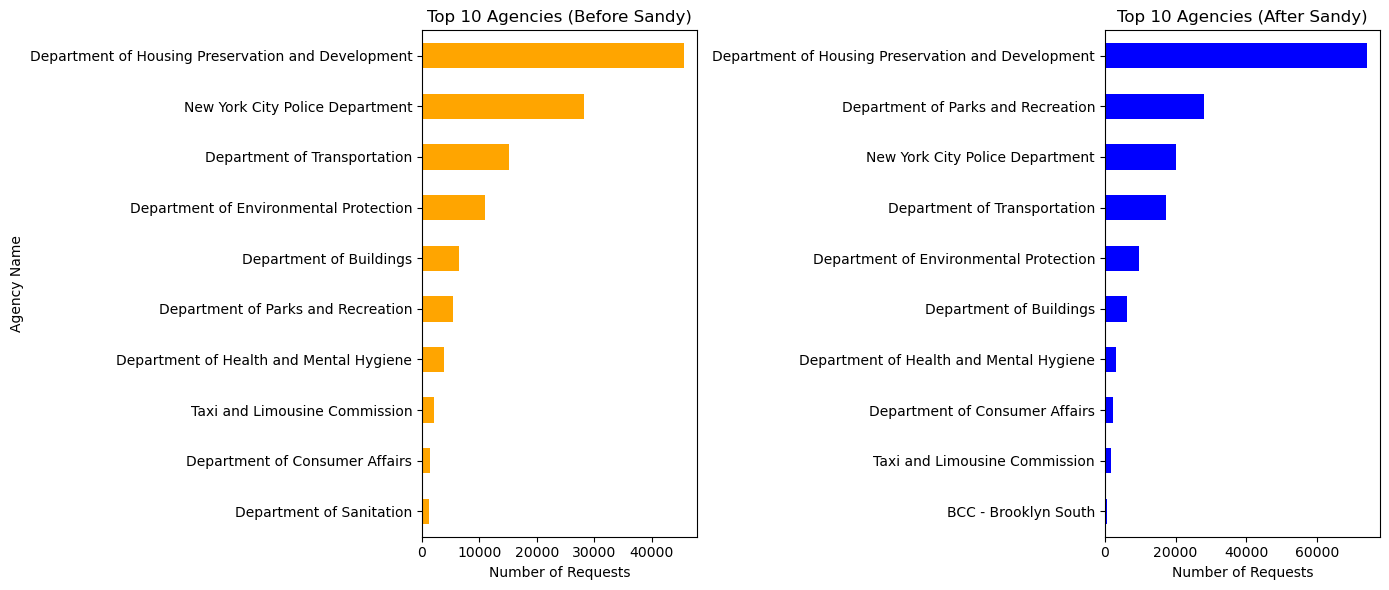

In [20]:
import matplotlib.pyplot as plt

# Get top 10 agencies before and after Sandy
top_agencies_before = sandy_before['agency_name'].value_counts().head(10)
top_agencies_after = sandy_after['agency_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(14, 6))

# Before Sandy
plt.subplot(1, 2, 1)
top_agencies_before.sort_values().plot(kind='barh', color='orange')
plt.title('Top 10 Agencies (Before Sandy)')
plt.xlabel('Number of Requests')
plt.ylabel('Agency Name')

# After Sandy
plt.subplot(1, 2, 2)
top_agencies_after.sort_values().plot(kind='barh', color='blue')
plt.title('Top 10 Agencies (After Sandy)')
plt.xlabel('Number of Requests')
plt.ylabel('')

plt.tight_layout()
#plt.savefig('Top 10 Agencies Sandy.png',dpi=400)
plt.show()


In [21]:
#What is the rate of incidents requests completed, before and after Sandy.
rate_before = sandy_before['closed_date'].notna().sum() / sandy_before['created_date'].count()
rate_after = sandy_after['closed_date'].notna().sum() / sandy_after['created_date'].count()

print(f"Rate Before Sandy: {rate_before:.2f}")
print(f"Rate After Sandy: {rate_after:.2f}")

Rate Before Sandy: 0.97
Rate After Sandy: 0.98


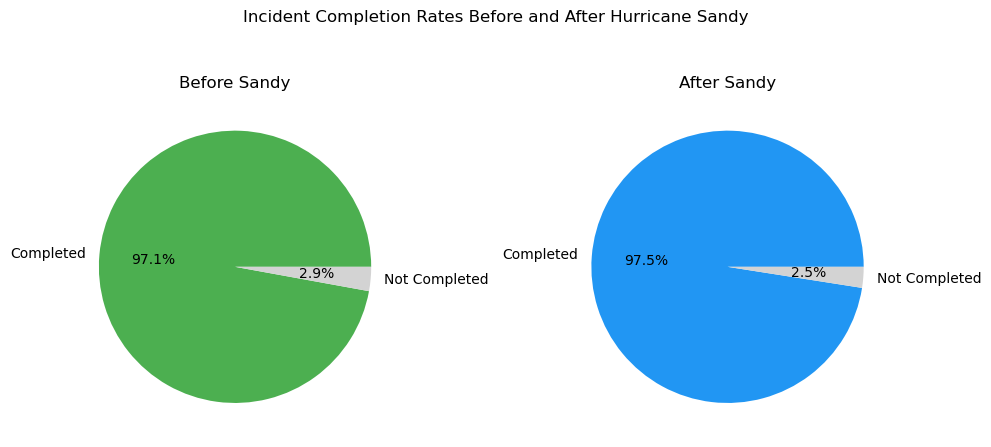

In [22]:
# Pie chart data
import matplotlib.pyplot as plt

completed_before = sandy_before['closed_date'].notna().sum()
not_completed_before = sandy_before['created_date'].count() - completed_before

completed_after = sandy_after['closed_date'].notna().sum()
not_completed_after = sandy_after['created_date'].count() - completed_after

# Plot side-by-side pie charts
plt.figure(figsize=(10, 5))

# Before Sandy
plt.subplot(1, 2, 1)
plt.pie([completed_before, not_completed_before], 
        labels=['Completed', 'Not Completed'], 
        autopct='%1.1f%%', 
        colors=['#4CAF50', '#D3D3D3'])
plt.title('Before Sandy')

# After Sandy
plt.subplot(1, 2, 2)
plt.pie([completed_after, not_completed_after], 
        labels=['Completed', 'Not Completed'], 
        autopct='%1.1f%%', 
        colors=['#2196F3', '#D3D3D3'])
plt.title('After Sandy')

plt.suptitle('Incident Completion Rates Before and After Hurricane Sandy')
plt.tight_layout()
#plt.savefig('Sandy Incident Closure rate.png',dpi=400)
plt.show()

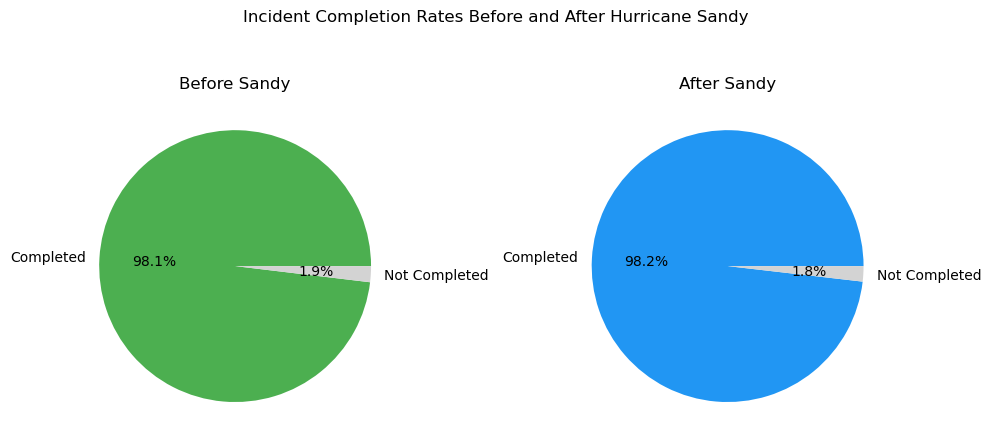

In [23]:
# Pie chart data using resolution date
import matplotlib.pyplot as plt

completed_before = sandy_before['closed_date'].notna().sum()
not_completed_before = sandy_before['resolution_date'].count() - completed_before

completed_after = sandy_after['closed_date'].notna().sum()
not_completed_after = sandy_after['resolution_date'].count() - completed_after

# Plot side-by-side pie charts
plt.figure(figsize=(10, 5))

# Before Sandy
plt.subplot(1, 2, 1)
plt.pie([completed_before, not_completed_before], 
        labels=['Completed', 'Not Completed'], 
        autopct='%1.1f%%', 
        colors=['#4CAF50', '#D3D3D3'])
plt.title('Before Sandy')

# After Sandy
plt.subplot(1, 2, 2)
plt.pie([completed_after, not_completed_after], 
        labels=['Completed', 'Not Completed'], 
        autopct='%1.1f%%', 
        colors=['#2196F3', '#D3D3D3'])
plt.title('After Sandy')

plt.suptitle('Incident Completion Rates Before and After Hurricane Sandy')
plt.tight_layout()
#plt.savefig('Sandy Incident Closure rate.png',dpi=400)
plt.show()

C:\Users\monua\AppData\Local\Temp\ipykernel_18188\1900839490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandy_before['resolution_time'] = sandy_before['resolution_date'] - sandy_before['created_date']
C:\Users\monua\AppData\Local\Temp\ipykernel_18188\1900839490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandy_before['resolution_time_hours'] = sandy_before['resolution_time'].dt.total_seconds() / 3600
C:\Users\monua\AppData\Local\Temp\ipykernel_18188\1900839490.py:4: SettingWithCopyWarning: 

                created_date     resolution_date   resolution_time  \
id                                                                   
24105074 2012-09-28 16:00:00 2012-09-28 17:40:00   0 days 01:40:00   
24105413 2012-09-28 15:06:00 2012-11-08 10:12:00  40 days 19:06:00   
24106416 2012-09-28 00:00:00 2012-10-03 00:00:00   5 days 00:00:00   
24106755 2012-09-28 21:47:00 2012-09-28 23:48:00   0 days 02:01:00   
24107121 2012-09-28 16:08:00 2013-07-30 00:00:00 304 days 07:52:00   

          resolution_time_hours  resolution_time_days  
id                                                     
24105074               1.666667              0.069444  
24105413             979.100000             40.795833  
24106416             120.000000              5.000000  
24106755               2.016667              0.084028  
24107121            7303.866667            304.327778  
                created_date     resolution_date  resolution_time  \
id                                              

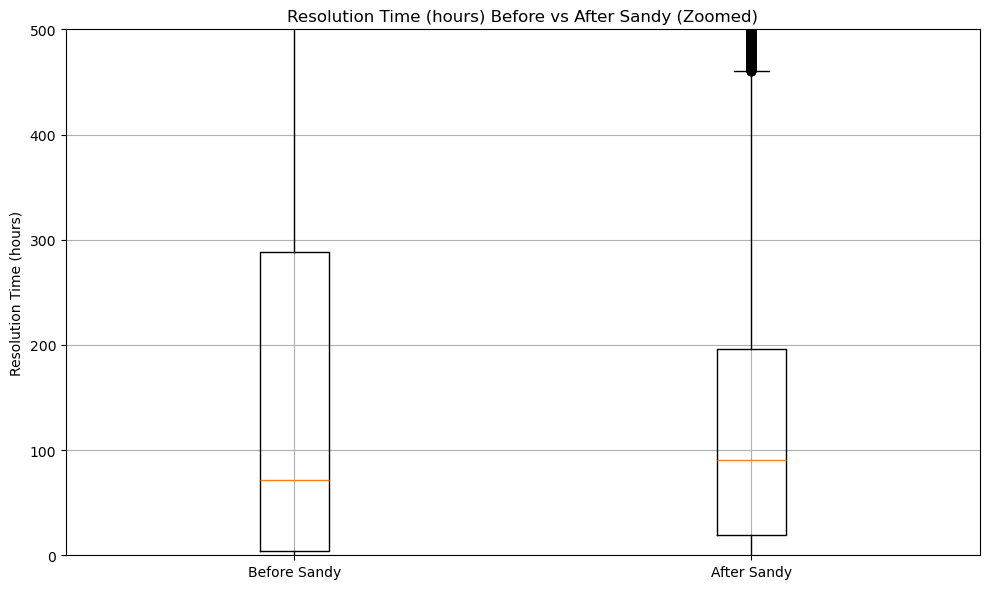

In [28]:
# Calculate resolution time for sandy_before
sandy_before['resolution_time'] = sandy_before['resolution_date'] - sandy_before['created_date']
sandy_before['resolution_time_hours'] = sandy_before['resolution_time'].dt.total_seconds() / 3600  
sandy_before['resolution_time_days'] = sandy_before['resolution_time'].dt.total_seconds() / (3600 * 24)

# Check results
print(sandy_before[['created_date', 'resolution_date', 'resolution_time', 'resolution_time_hours', 'resolution_time_days']].head())

# Calculate resolution time for sandy_after
sandy_after['resolution_time'] = sandy_after['resolution_date'] - sandy_after['created_date']
sandy_after['resolution_time_hours'] = sandy_after['resolution_time'].dt.total_seconds() / 3600
sandy_after['resolution_time_days'] = sandy_after['resolution_time'].dt.total_seconds() / (3600 * 24)

# Check results
print(sandy_after[['created_date', 'resolution_date', 'resolution_time', 'resolution_time_hours', 'resolution_time_days']].head())

# Plotting
plt.figure(figsize=(10, 6))
data = [sandy_before['resolution_time_hours'].dropna(), sandy_after['resolution_time_hours'].dropna()]
plt.boxplot(data, labels=['Before Sandy', 'After Sandy'])
plt.ylim(0, 500)  # adjust max y-value as needed

plt.title('Resolution Time (hours) Before vs After Sandy (Zoomed)')
plt.ylabel('Resolution Time (hours)')
plt.grid(True)
plt.tight_layout()
plt.savefig('Sandy Resolution Time.png',dpi=400)
plt.show()